<a href="https://colab.research.google.com/github/Neeshi14/Task7/blob/main/CNNusingpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

In [ ]:
train_dataset = datasets.MNIST('../data', train=True, download=True,
                              transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 130MB/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 39.3MB/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 87.5MB/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.95MB/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=164, shuffle=True)

In [ ]:
test_dataset = datasets.MNIST('../data',train=False, transform=transform)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1000,shuffle=False)

In [ ]:

for X, Y in train_loader:
    print("TRAIN_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break
for X, Y in test_loader:
    print("TEST_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break

TRAIN_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([164, 1, 28, 28])
Shape of y: torch.Size([164]) torch.int64
TEST_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([1000, 1, 28, 28])
Shape of y: torch.Size([1000]) torch.int64


# **Implement the CNN model**

In [ ]:
import torch.nn as nn  # for building neural networks
import torch.nn.functional as F # for activation function

In [ ]:
class Net(nn.Module):
  def __init__(self):
     super(Net,self).__init__()
     self.conv1=nn.Conv2d(1,32,3,1)#conv2d(input channel,output channel,kernel size,stride)
     self.conv2=nn.Conv2d(32,64,3,1)
     self.dropout1=nn.Dropout2d(0.25)
     self.dropout2=nn.Dropout2d(0.5)
     self.fc1=nn.Linear(9216,128)# fully connected layer,9216->input feature,128->output feature
     self.fc2=nn.Linear(128,10)

  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.max_pool2d(x,kernel_size=2)
    x= self.dropout1(x)
    x=torch.flatten(x,1)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.dropout2(x)
    x=self.fc2(x)
    output =F.log_softmax(x,dim=1)
    return output


In [ ]:
import torch.optim as optim

model = Net()  # Create an instance of your CNN model
optimizer = optim.Adam(model.parameters(), lr=0.001)   #Parameters()->learnable parameter(likes:Weights and biases, learning rate=0.001)
criterion = nn.CrossEntropyLoss()  # Choose a loss function

In [ ]:
epochs = 3  # Number of training epochs

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Reset gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backpropagate gradients
        optimizer.step()  # Update model parameters

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
correct_predictions = 0
total_images = 0

with torch.no_grad():  # Disable gradient calculation for testing
    for images,label in test_loader:
        predictions = model(images) #model's predictions for the current batch of images
        _, predicted_class = torch.max(predictions, 1) #predicted class for each image
        total_images += label.size(0)
        correct_predictions += (predicted_class == label).sum().item()

accuracy = 100 * correct_predictions / total_images
print(f'Accuracy: {accuracy:.2f}%')

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Accuracy: 97.87%


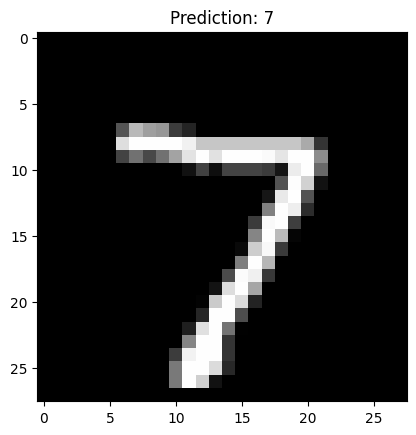

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a single image from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)
image = images[0]  # Get the first image

# Make a prediction
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add a batch dimension
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f'Prediction: {predicted.item()}')
plt.show()

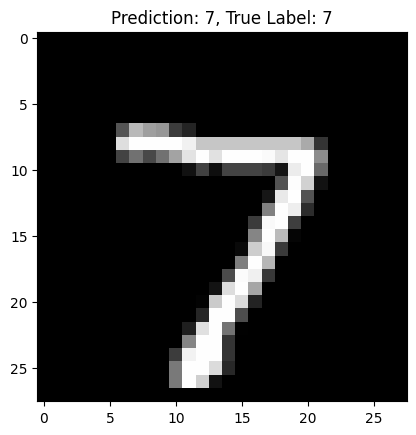

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a single image from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)
image = images[0]  # Get the first image
true_label = labels[0]  # Get the true label of the first image

# Make a prediction
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add a batch dimension
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f'Prediction: {predicted.item()}, True Label: {true_label.item()}')
plt.show()

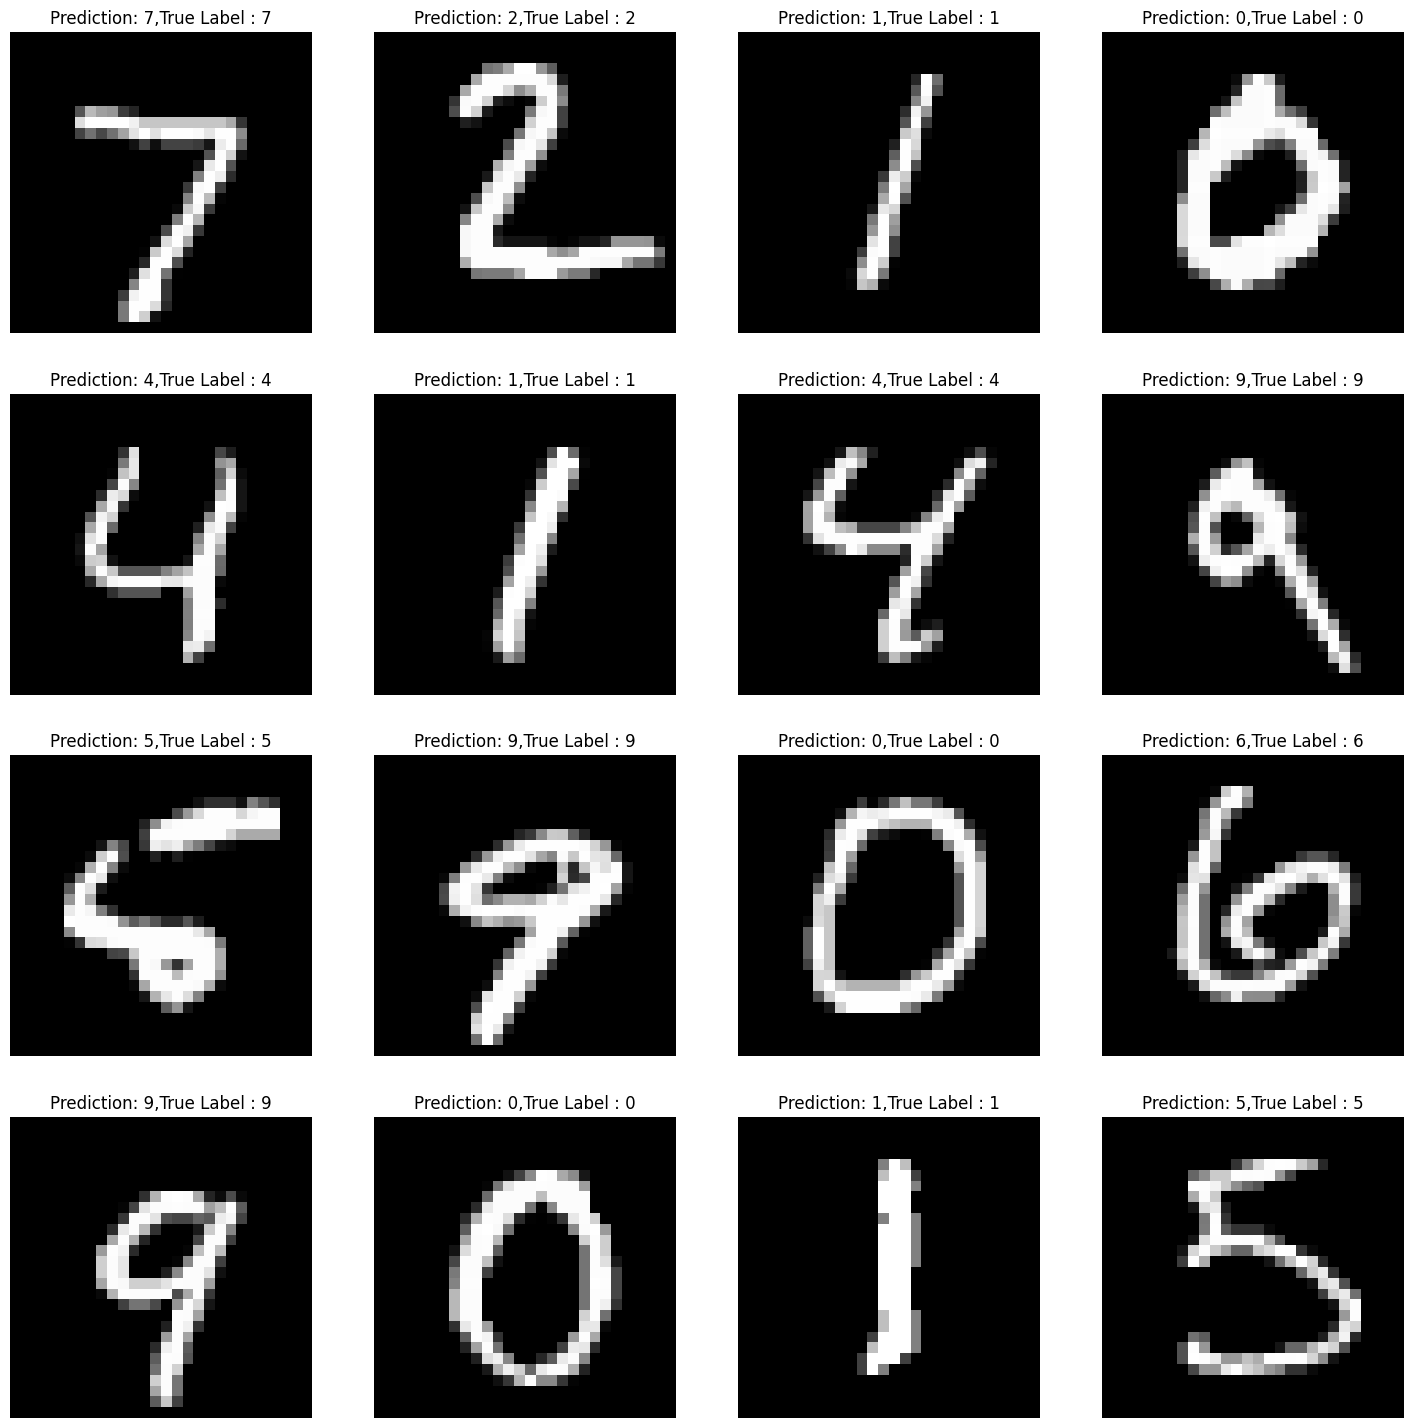

In [ ]:
# Get a batch of images from the test loader
images, labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# Display some images and their predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
true_label = labels.numpy()
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Prediction: {predicted[i].item()},True Label : {true_label[i]}')
    ax.axis('off')
plt.show()